# CENSUS INCOME PROJECT

NAME: VAIBHAV VILAS TAYADE

Contact: 8087970061

Email Id: vaibhav_t29@rediffmail.com

# IMPORTING RELEVANT LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# IMPORTING FILE:

In [2]:
df_1 = pd.read_csv('census_income.csv')

In [3]:
df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


OBSERVATION: We can see that in above description details of the dataframe, there are few columns in which Mean value is higher than Median which indicates presence of outliers and skewness in the dataset.

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

OBSERVATION: There are No Null values present in the dataset.

In [6]:
# checking values counts of target column.
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

# CHECKING OUTLIERS:

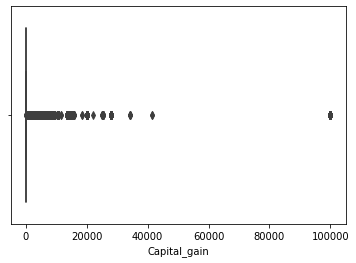

In [21]:
# boxplot 1 >>>
sns.boxplot(df['Capital_gain'])

observation: we can see the presence of outliers in the above 'Capital_gain' column.

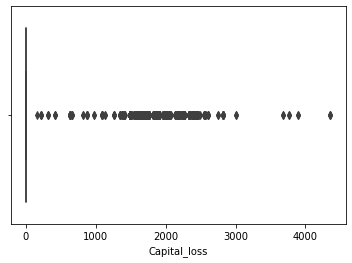

In [22]:
# boxplot 2 >>>
sns.boxplot(df['Capital_loss'])

Observation: We can see the presence of outliers in the above column i.e. 'Capital_Loss'

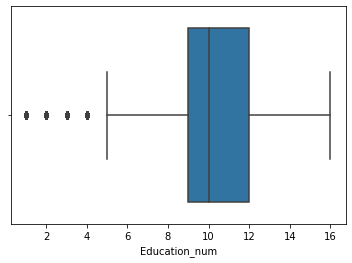

In [23]:
# boxplot 3 >>>
sns.boxplot(df['Education_num'])

Observation: We can see presence of outliers in the above column i.e. 'Education_num'

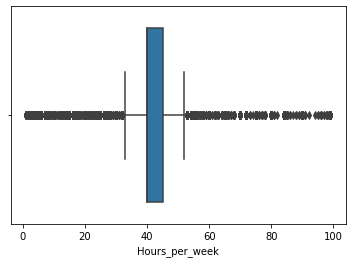

In [24]:
# boxplot 4 >>>
sns.boxplot(df['Hours_per_week'])

Observation: We can see presence of outliers in the above column i.e. 'Hours_per_week'

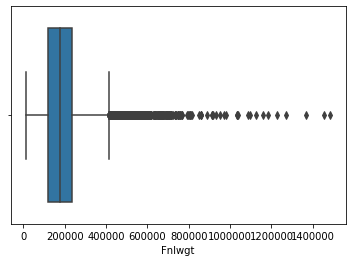

In [25]:
# boxplot 5 >>>
sns.boxplot(df['Fnlwgt'])

Observation: We can see presence of outliers in the above column i.e. 'Fnlwgt'

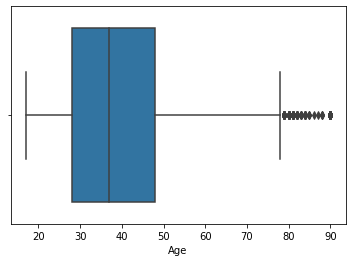

In [26]:
# boxplot 6 >>>
sns.boxplot(df['Age'])

Observation: We can see presence of outliers in the above column i.e. 'Age'

# CHECKING SKEWNESS:

In [27]:
df_n = df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]

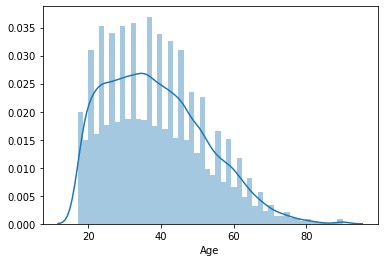

In [28]:
# distplot 1 >>>
sns.distplot(df_n['Age'])

Observation: We can see presence of Skewness in the above column i.e. 'Age'

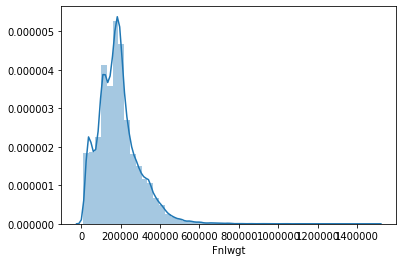

In [29]:
# distplot 2 >>>
sns.distplot(df_n['Fnlwgt'])

Observation: We can see presence of Skewness in the above column i.e. 'Fnlwgt'

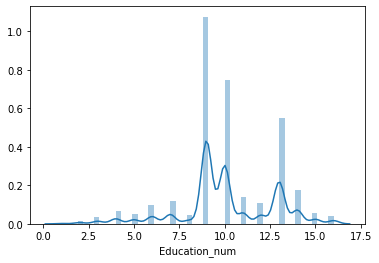

In [30]:
# distplot 3 >>>
sns.distplot(df_n['Education_num'])

Observation: We can see presence of Skewness in the above column i.e. 'Education_num'

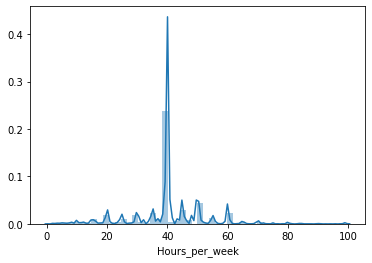

In [31]:
# distplot 4 >>>
sns.distplot(df_n['Hours_per_week'])

Observation: We can see presence of Skewness in the above column i.e. 'Hours_per_week'

In [81]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# BIVARIATE ANALYSIS:

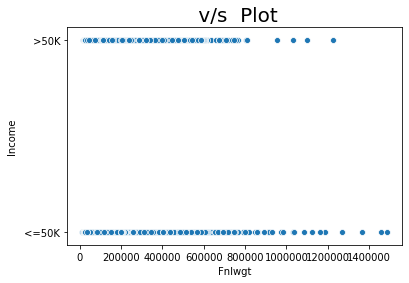

In [83]:
# scatter plot 1 >>>
plt.title('Fnlwgt v/s Income Plot', fontsize = 20)
sns.scatterplot(df_1['Fnlwgt'], df_1['Income'])

Observation: We can see that from the above scatter plot, more the Fnlwgt values population has income less than 50K, and less the Fnlwgt values population has income more than 50K.

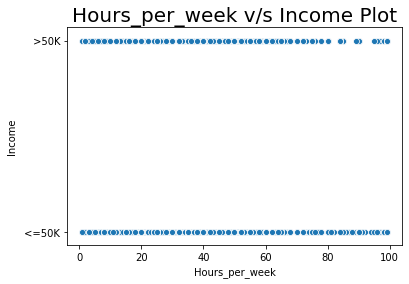

In [93]:
# scatter plot 2 >>>
plt.title('Hours_per_week v/s Income Plot', fontsize = 20)
sns.scatterplot(df_1['Hours_per_week'], df_1['Income'])

Observation: We can see that in the above scatter plot that more the Hours_per_week values population has, lesser income than 50K they have, and less the Hours_per_week values population has, greater income than 50K they have.

In [32]:
# checking datatypes of full dataframe.
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# LABEL ENCODING THE CATEGORICAL DATA:

In [33]:
LE = LabelEncoder()
df['Workclass'] = LE.fit_transform(df['Workclass'])
df['Education'] = LE.fit_transform(df['Education'])
df['Marital_status'] = LE.fit_transform(df['Marital_status'])
df['Occupation'] = LE.fit_transform(df['Occupation'])
df['Relationship'] = LE.fit_transform(df['Relationship'])
df['Race'] = LE.fit_transform(df['Race'])
df['Sex'] = LE.fit_transform(df['Sex'])
df['Native_country'] = LE.fit_transform(df['Native_country'])
df['Income'] = LE.fit_transform(df['Income'])



# CORRELATION MATRIX ANALYSIS:

In [77]:
dfcor = df.corr()
dfcor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


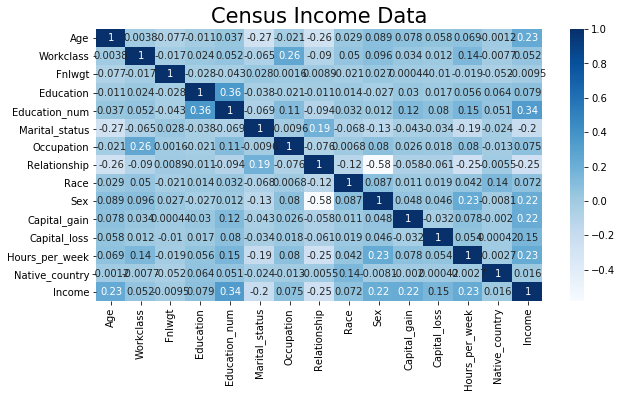

In [78]:
plt.figure(figsize=(10,5))
plt.title('Census Income Data', fontsize = 21)

sns.heatmap(dfcor,cmap='Blues', annot=True)

OBSERVATION: We can see that, almost all the columns are possitively corelated with the Income column. 
Fnlwgt column is -0.0095 values negatively corelated with Income column.
Capital_gain column is 0.22 values positively corelated with Income column.
Capital_loss column is 0.15 values positively corelated with Income column.
Hours_per_week column is 0.23 values positively corelated with Income column.


# PLOTTING PAIRPLOT:

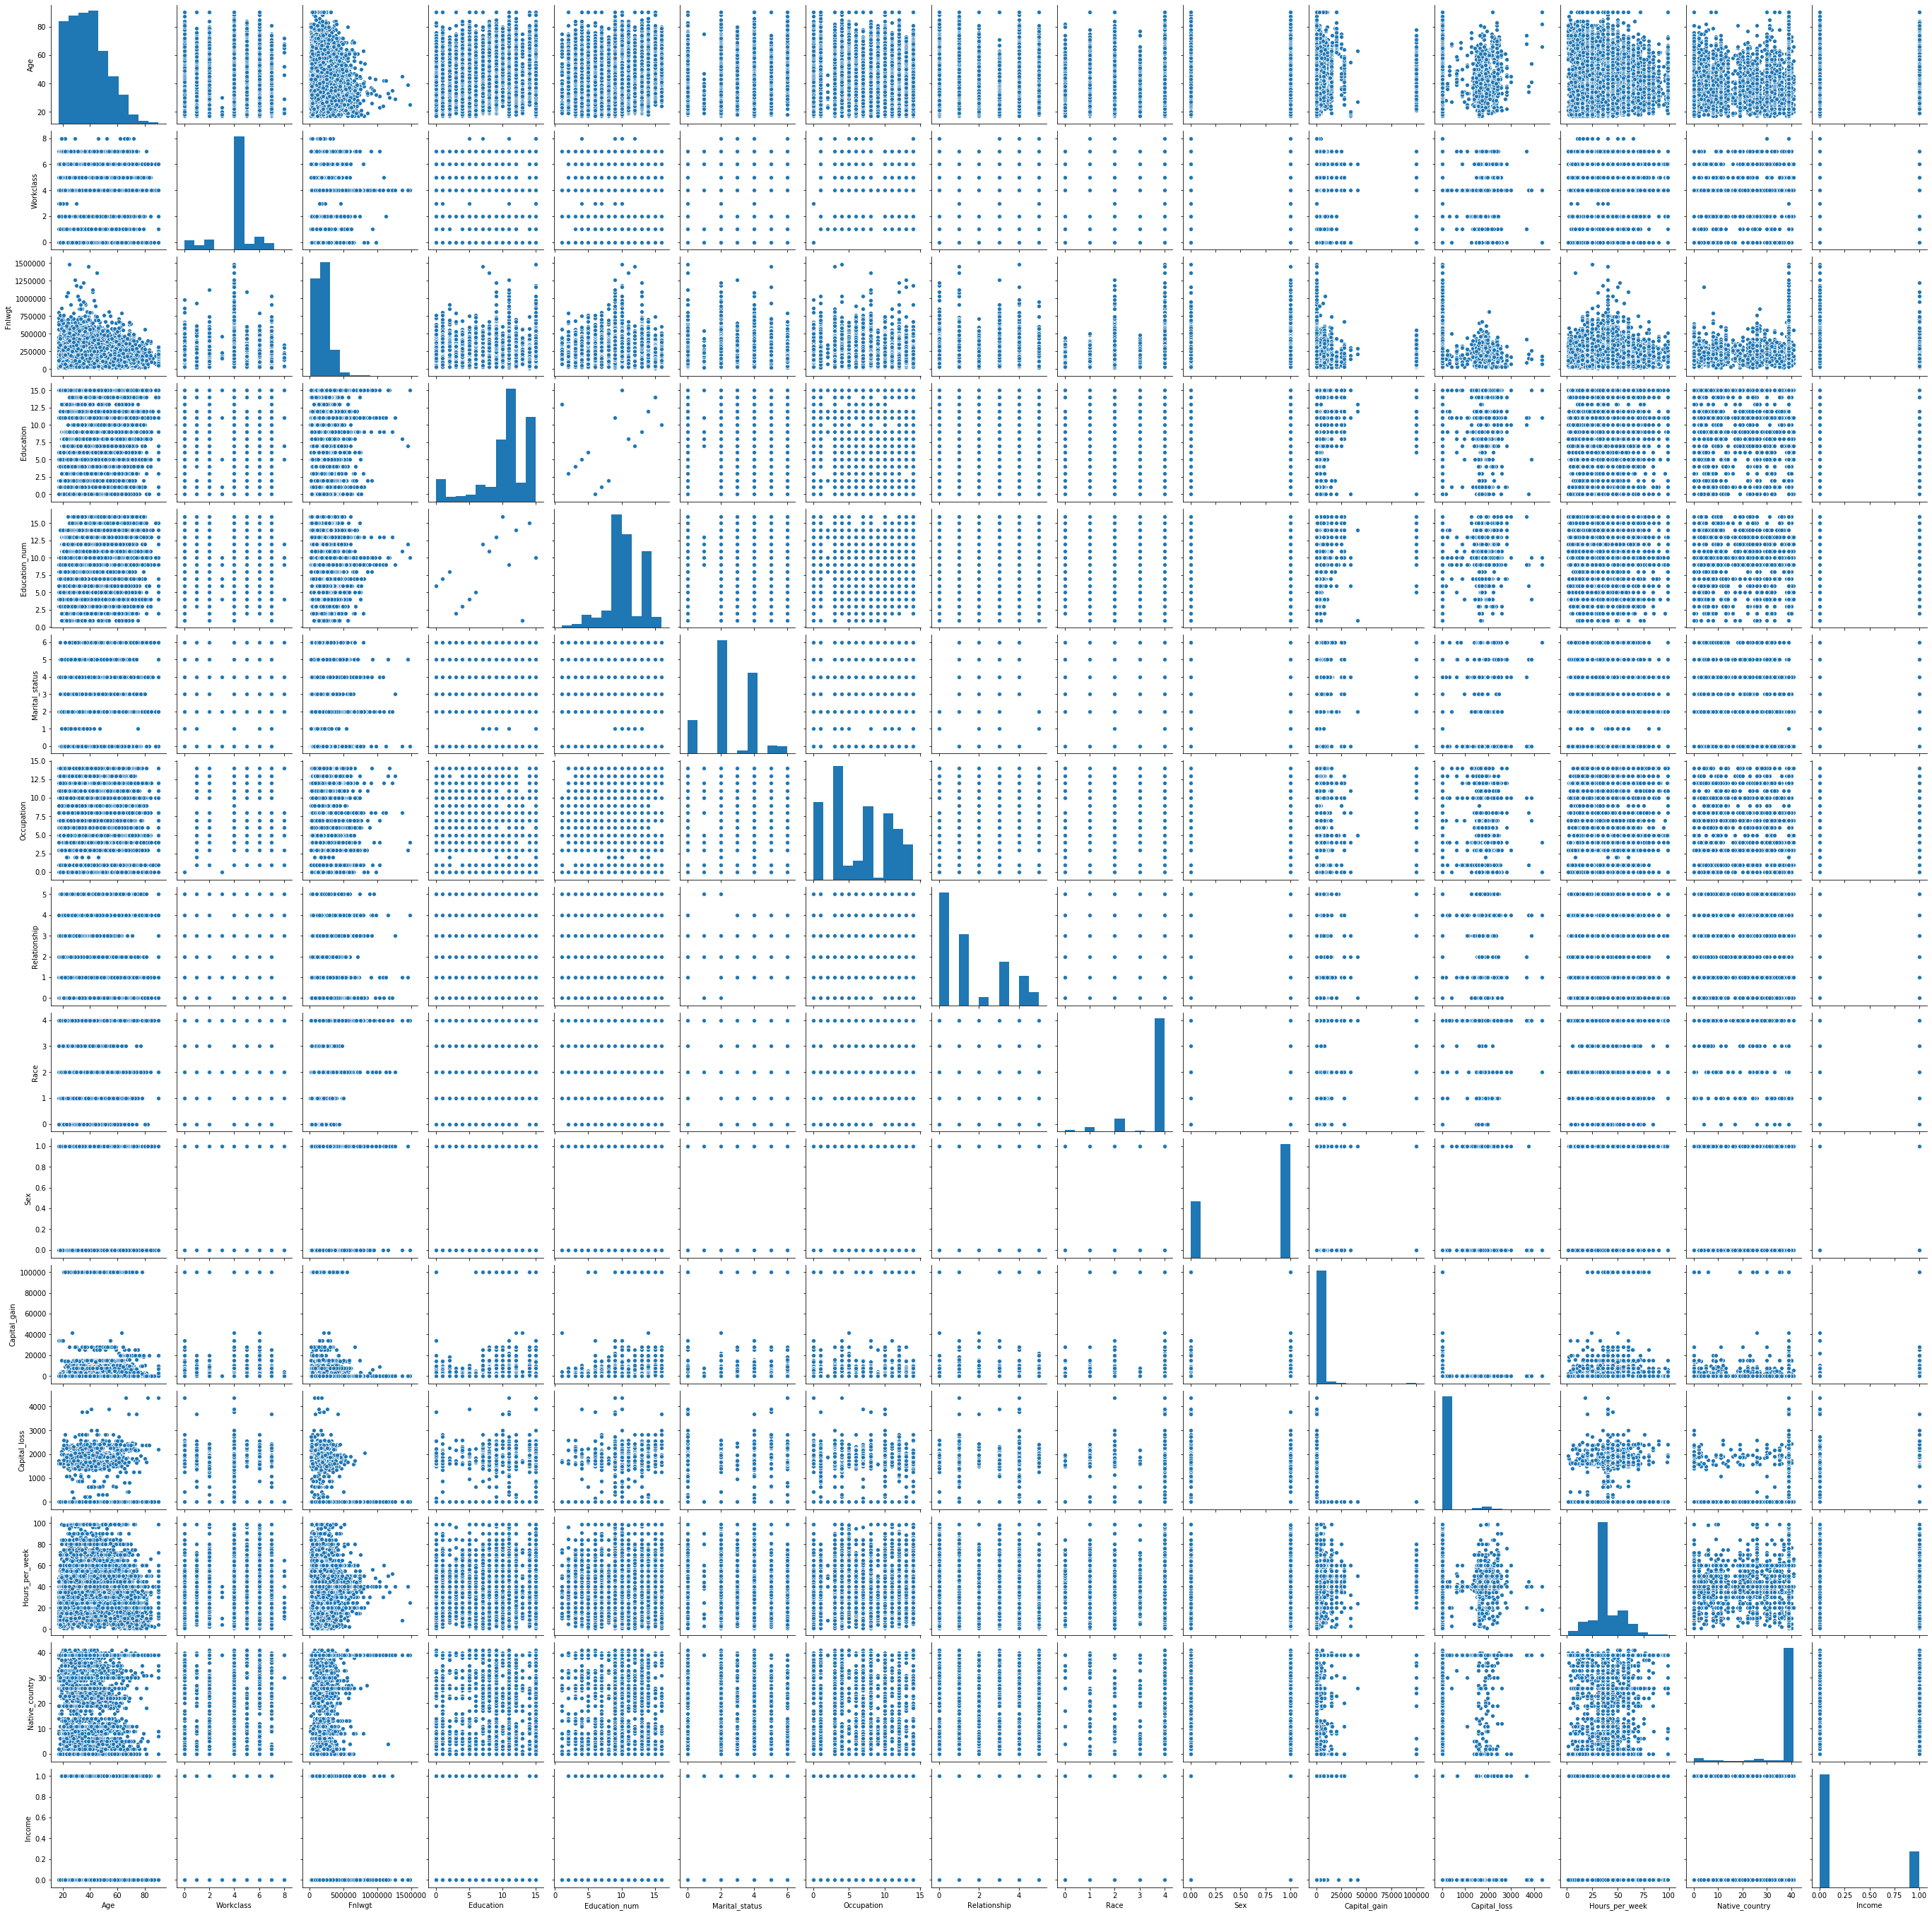

In [79]:
sns.pairplot(df)

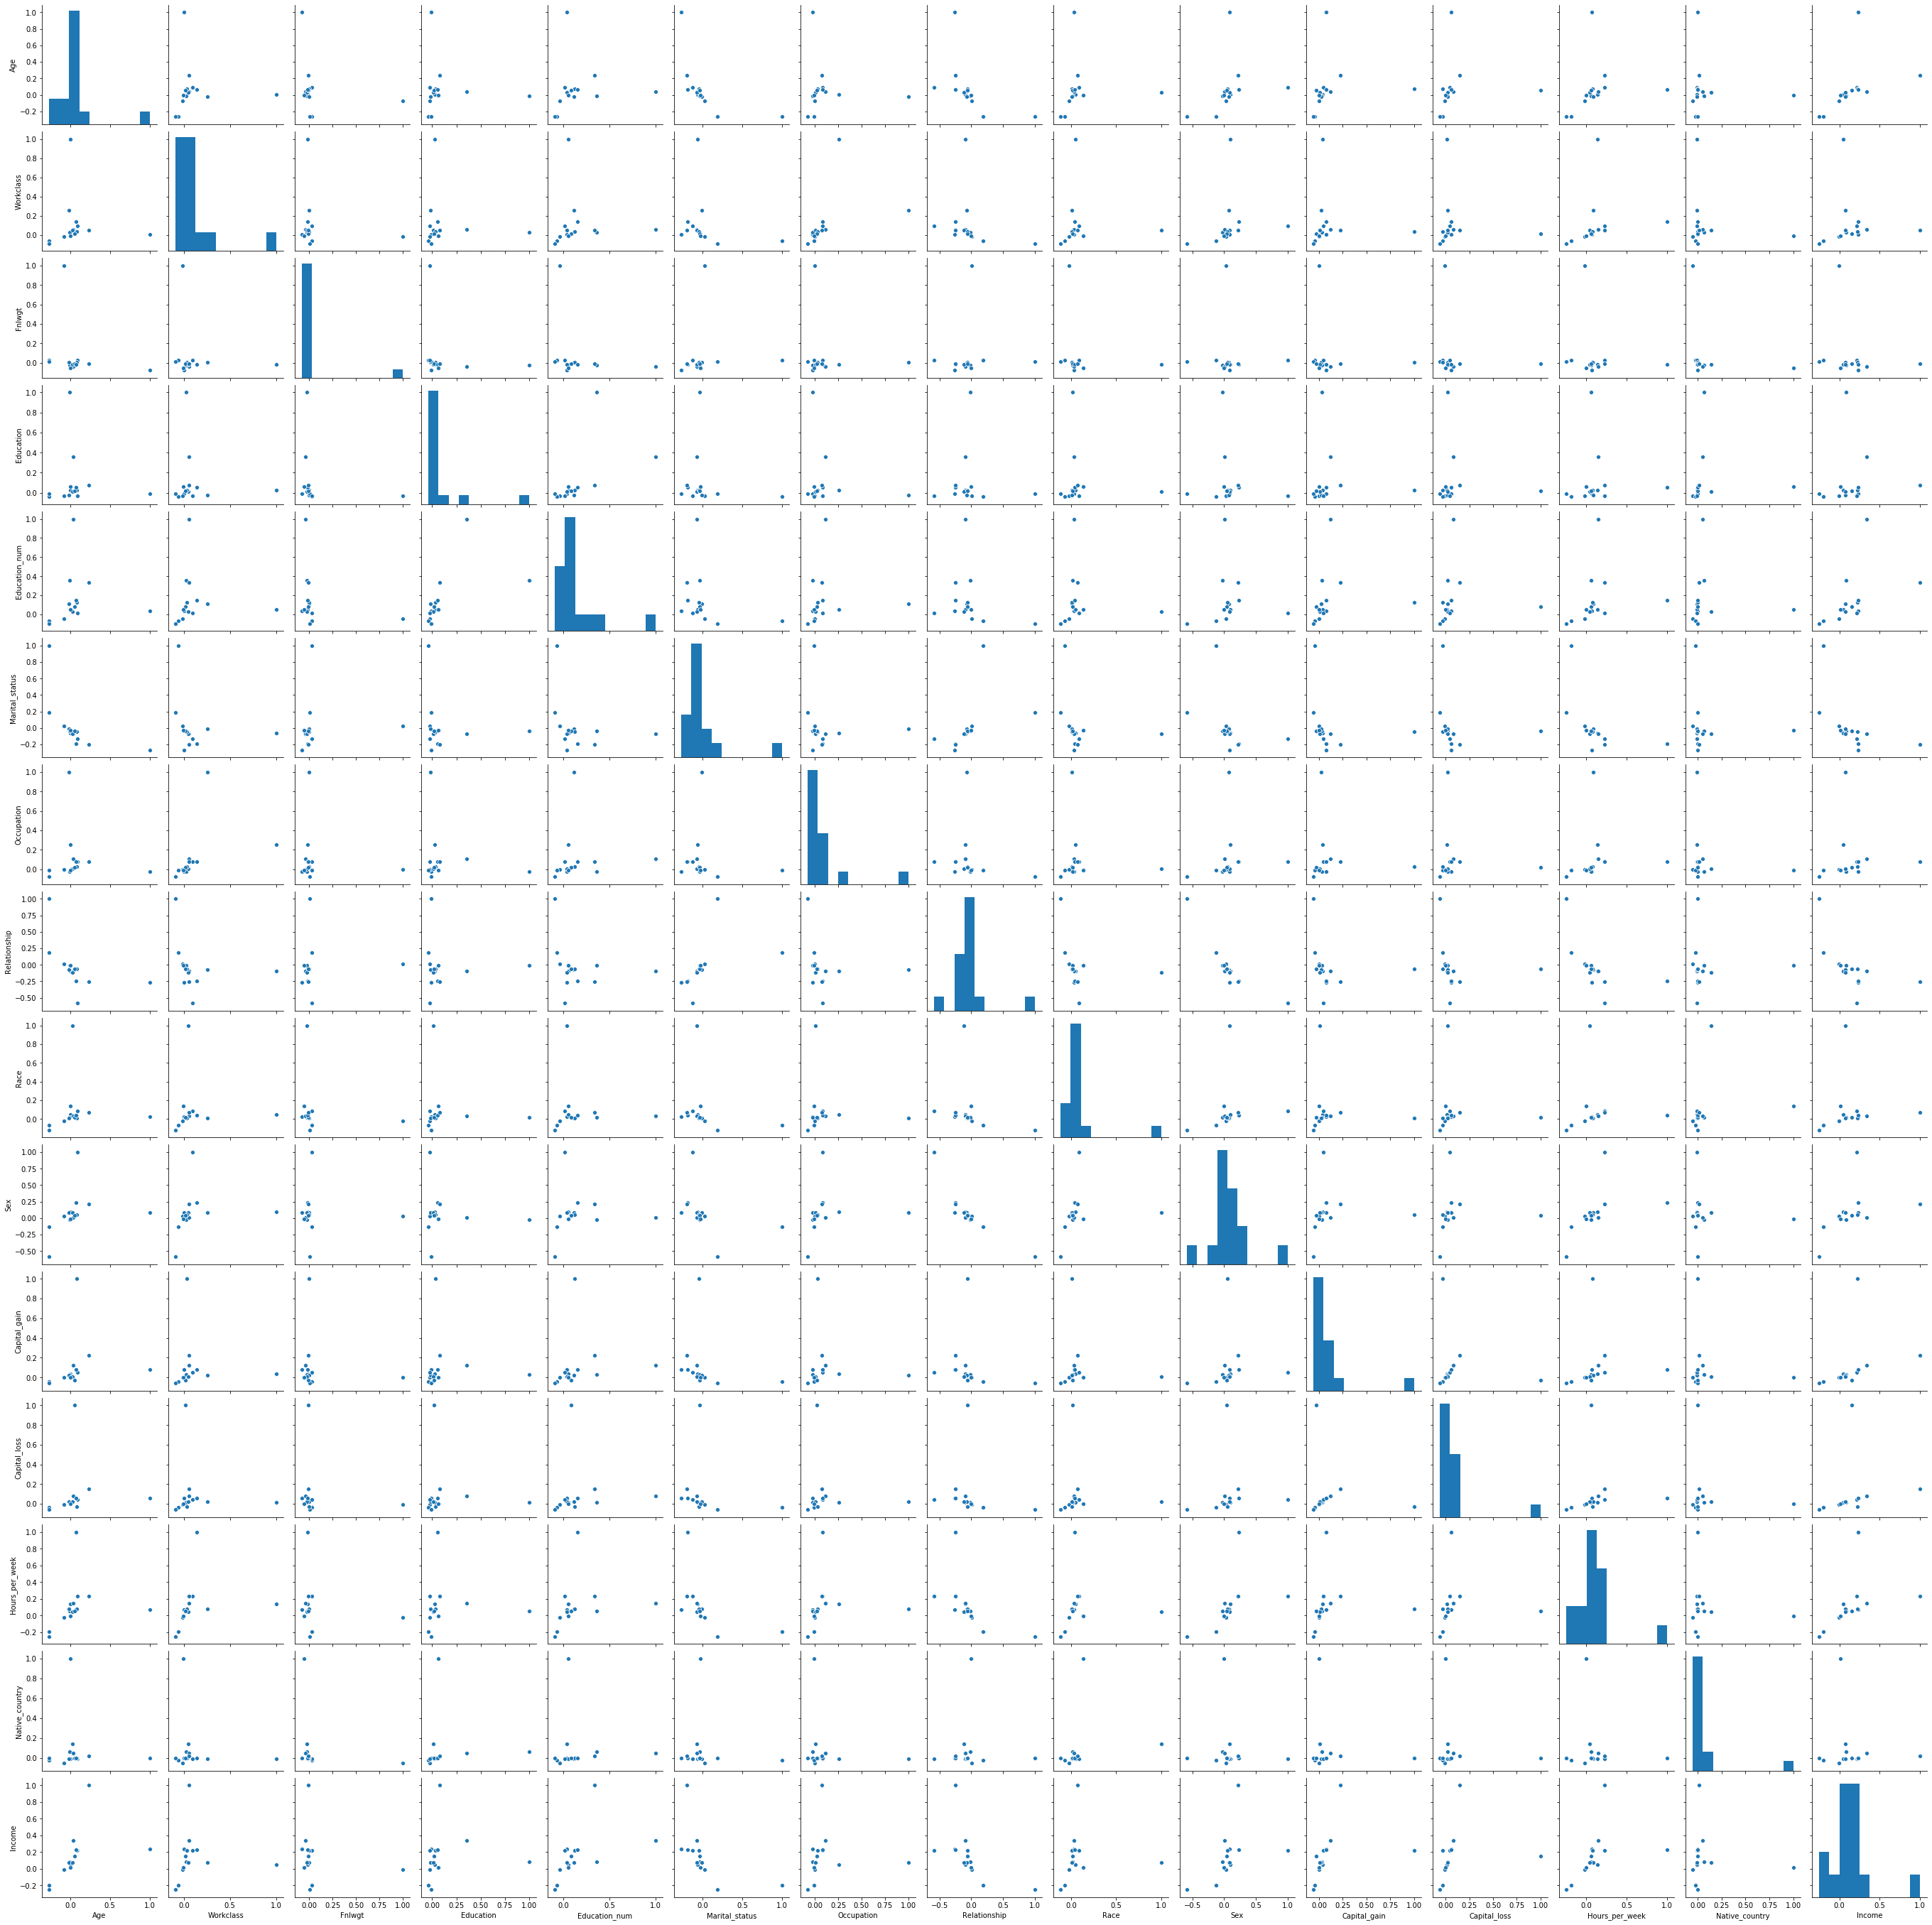

In [80]:
sns.pairplot(dfcor)

OBSERVATION: We can see that, almost all the columns are possitively corelated with the Income column except few i.e. Fnlwgt column, Capital_gain, Capital_loss, Hours_per_week are negatively corelated with Income column.


# CHECKING AMOUNT OF SKEWNESS:

In [34]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

OBSERVATION: We can see there are huge amount of skewness in Age, Fnlwgt, Capital_gain, Capital_loss and Hours_per_week columns.

# REMOVING OUTLIERS:

In [35]:
#Removing Outliers:
z=np.abs(zscore(df))
z

array([[0.83709708, 1.46388339, 1.0087417 , ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.04264043, 0.09012148, 0.24504633, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05703146, 0.09012148, 0.42576955, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42358875, 0.09012148, 0.3588108 , ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21562378, 0.09012148, 0.11092744, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98372   , 0.77700244, 0.92986178, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [36]:
threshold = 3
print(np.where(z>threshold))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [37]:
#creating new dataset without outliers and skewness
df_new = df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [38]:
# checking skewness of new dataset:
df_new.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
Income             1.324919
dtype: float64

OBSERVATION: We can see that skewness has been reduced drastically using zscore technique.

# CHECKING DATALOSS:

In [39]:
# checking loss of the data after removing outliers.

print(((df.shape[0]-df_new.shape[0])/df.shape[0]*100))

15.795454545454547


OBSERVATION: We can see that after removing outliers, we are loosing almost 15.79 % of data, which is not fine, so in this case, we'll consider dataset as it is with outliers itself.

# CREATING NEW X,Y DATASET:

In [40]:
# creating dataframe for algorithm modeling.

x = df.iloc[:,0:14]
y = df.iloc[:,-1]

In [41]:
x.shape

(32560, 14)

In [42]:
y.shape

(32560,)

In [43]:
x.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country'],
      dtype='object')

# SCALING THE DATASET:

In [44]:
sc = StandardScaler()
x= sc.fit_transform(x)
columnslist = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']
X= pd.DataFrame(x, columns = columnslist)
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.837097,1.463883,-1.008742,-0.335443,1.134779,-0.406183,-0.608434,-0.900177,0.393675,0.703087,-0.145914,-0.216663,-2.22212,0.291573
1,-0.042640,0.090121,0.245046,0.181319,-0.420027,-1.734026,-0.135480,-0.277810,0.393675,0.703087,-0.145914,-0.216663,-0.03543,0.291573
2,1.057031,0.090121,0.425770,-2.402489,-1.197429,-0.406183,-0.135480,-0.900177,-1.962583,0.703087,-0.145914,-0.216663,-0.03543,0.291573
3,-0.775755,0.090121,1.408146,-0.335443,1.134779,-0.406183,0.810427,2.211658,-1.962583,-1.422298,-0.145914,-0.216663,-0.03543,-4.054157
4,-0.115952,0.090121,0.898170,0.439700,1.523480,-0.406183,-0.608434,2.211658,0.393675,-1.422298,-0.145914,-0.216663,-0.03543,0.291573


# CHECKING DATASET BALANCING IN TARGET COLUMN:

In [45]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

Observation: We can see that our dataset is not balanced, we need to balanced the dataset using SMOTE, oversampling technique.

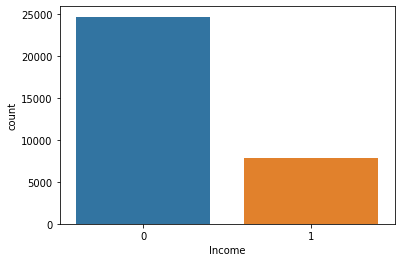

In [46]:
#plotting the imbalanced dataset:

import seaborn as sns
ax = sns.countplot(x='Income', data = df)
ax

# BALANCING DATASET:

In [47]:
# balancing the dataset with over sampling technique.
SM = SMOTE()
x_over, y_over = SM.fit_resample(X, y)

In [48]:
x_over.shape

(49438, 14)

In [49]:
y_over.shape

(49438,)

In [50]:
#After Balancing the dataset

y_over.value_counts()

1    24719
0    24719
Name: Income, dtype: int64

OBSERVATION: We can now see that our dataset is very well balanced.

# CREATING TRAIN TEST DATASET:

In [51]:
#creating train test dataset from the x and y part inoder to start model making.

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(39550, 14)
(39550,)
(9888, 14)
(9888,)


# LOGISTIC REGRESSION:

In [52]:
# Logistic Regression:

lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
print('accuracy score - ', accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

accuracy score -  0.7695186084142395
[[3794 1149]
 [1130 3815]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4943
           1       0.77      0.77      0.77      4945

    accuracy                           0.77      9888
   macro avg       0.77      0.77      0.77      9888
weighted avg       0.77      0.77      0.77      9888



Checking over fitting of the model using cross validation score:

In [53]:
print(cross_val_score(lg, x_over, y_over, cv=5).mean())

0.7690845346918561


# GAUSSIAN NB METHOD:

In [54]:
#As there are two target categories present in target column i.e. 'Income' column.
# We can use GaussianNB algorithm for model making.

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predg = gnb.predict(x_test)
print(accuracy_score(y_test, predg))
print(confusion_matrix(y_test, predg))
print(classification_report(y_test, predg))

0.7044902912621359
[[4587  356]
 [2566 2379]]
              precision    recall  f1-score   support

           0       0.64      0.93      0.76      4943
           1       0.87      0.48      0.62      4945

    accuracy                           0.70      9888
   macro avg       0.76      0.70      0.69      9888
weighted avg       0.76      0.70      0.69      9888



Checking over fitting of the model using cross validation score:

In [55]:
print(cross_val_score(gnb, x_over, y_over, cv=5).mean())

0.705166107598386


# DECISION TREE CLASSIFIER METHOD:

In [56]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.8542677993527508
[[4175  768]
 [ 673 4272]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4943
           1       0.85      0.86      0.86      4945

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888



Checking over fitting of the model using cross validation score:

In [57]:
print(cross_val_score(dtc, x_over, y_over, cv=5).mean())

0.8524429287191214


# RANDOM FOREST CLASSIFIER:

In [58]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8993729773462783
[[4370  573]
 [ 422 4523]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      4943
           1       0.89      0.91      0.90      4945

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888



Checking over fitting of the model using cross validation score:

In [59]:
print(cross_val_score(rf, x_over, y_over, cv=5).mean())

0.9017974266165598


# ADA BOOST CLASSIFIER METHOD:

In [60]:
ad = AdaBoostClassifier(n_estimators=100)
ad.fit(x_train, y_train)
pred=ad.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8602346278317152
[[4151  792]
 [ 590 4355]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4943
           1       0.85      0.88      0.86      4945

    accuracy                           0.86      9888
   macro avg       0.86      0.86      0.86      9888
weighted avg       0.86      0.86      0.86      9888



Checking over fitting of the model using cross validation score:

In [61]:
print(cross_val_score(ad, x_over, y_over, cv=5).mean())

0.8558201814811579


# SUPPORT VECTOR CLASSIFIER METHOD:

In [62]:
sv = SVC()
sv.fit(x_train, y_train)
pred= sv.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8360639158576052
[[3848 1095]
 [ 526 4419]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4943
           1       0.80      0.89      0.85      4945

    accuracy                           0.84      9888
   macro avg       0.84      0.84      0.84      9888
weighted avg       0.84      0.84      0.84      9888



Checking over fitting of the model using cross validation score:

In [63]:
print(cross_val_score(sv, x_over, y_over, cv=5).mean())

0.8351068121553489


# OBSERVATION:

By checking all model's accuracy score and their cross validation score, we know that LogisticRegression model is our best fit model as it has less overfitting values.

# HYPER PARAMETER TUNING:

In [64]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [65]:
# parameters to be tuned.
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [66]:
# defining grid search
# creating dictionary of parameters.
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

In [67]:
#checking best parameters:
grid_search.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

# FINAL MODEL MAKING:

In [68]:
# Logistic Regression:

lg_f = LogisticRegression(C=10, penalty= 'l2', solver = 'newton-cg')
lg_f.fit(x_train, y_train)
pred = lg_f.predict(x_test)
print('accuracy score - ', accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

accuracy score -  0.7695186084142395
[[3794 1149]
 [1130 3815]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4943
           1       0.77      0.77      0.77      4945

    accuracy                           0.77      9888
   macro avg       0.77      0.77      0.77      9888
weighted avg       0.77      0.77      0.77      9888



# OBSERVATION:

We have observed that by hyperparameter tuning also we have not been able to increase the accuracy of the model. We can consider the same model as our final model.

# AUC ROC CURVE:

In [70]:
# false positive rate: fpr
# true positive rate: tpr
# AUC : Area under curve.
# ROC : Receiver operating characteristic.

fpr, tpr, thresholds = roc_curve(y_test, pred)

In [71]:
# creating y_train and y_test predicted dataset
y_train_pred = lg_f.decision_function(x_train)    
y_test_pred = lg_f.decision_function(x_test) 

In [72]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

In [73]:
# checking area under value:
print("area under curve (auc): ", metrics.roc_auc_score(y_test, pred))

area under curve (auc):  0.7695182103277668


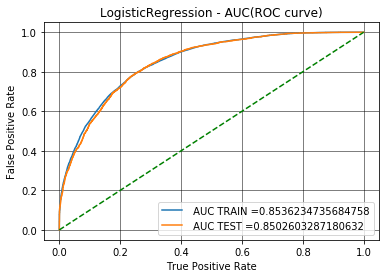

In [74]:
from sklearn.metrics import roc_curve, auc

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("LogisticRegression - AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# OBSERVATION:

Observation:
    AUC Test curve is built good, almost close to the AUC train, curve is having characteristics of slow curvature, which indicates, a better AUC curve, and a good model builing.

# SAVING FILE:

In [75]:
import joblib
joblib.dump(lg_f, 'Vaibhav_Census_Income_Project_Model.pkl')

['Vaibhav_Census_Income_Project_Model.pkl']

# RELOADING FILE:

In [76]:
#Reloading the model and predicting the dataset.
Loan_Prediction_Project_Model = joblib.load('Vaibhav_Census_Income_Project_Model.pkl')
Loan_Prediction_Project_Model.predict(x_train)

array([1, 0, 1, ..., 1, 0, 0])

CONCUSION:

    Our model is very well performing with an accuracy score of 76.95 % accuracy.

# THANK YOU